In [1]:
from __future__ import print_function, division

# 2. Density based plots with `matplotlib`

In this section, we will be looking at density based plots. Plots like these address a problem with big data: How does one visualise a plot with 10,000++ data points and avoid **overplotting**. 

In [3]:
import pandas as pd

PRSA = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv",
                  index_col=0)
PRSA.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


*Source* : https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

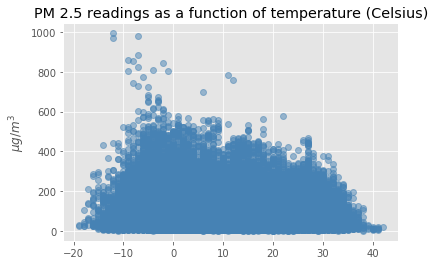

In [18]:
import matplotlib.pyplot as plt
from matplotlib.style import use
%matplotlib inline
use('ggplot')

plt.plot( PRSA.TEMP, PRSA["pm2.5"], 'o', color="steelblue", alpha=0.5)
plt.ylabel("$\mu g/m^3$")
plt.title("PM 2.5 readings as a function of temperature (Celsius)")


As one can see, there's not much one can say about the structure of the data because every point below 400 $\mu g/m^3$ is totally filled up with blue color. 

It is here, that a density plot helps mitigate this problem. The central idea is that individual data points are not so important in as much as they contribute to revealing the underlying **distribution** of the data. In other words, for large amounts of data, we want to visualize the distribution instead of visualizing how individual datapoints are placed. 

For this lesson, we will look at this data set and others to investigate the use of other plotting functions in `matplotlib`. 

## 2.1 Learning objectives 

  * To use histograms to visualize distribution of univariate data. 
  * To use Kernel Density Estimation Plots to visualize distribution of univariate data. 
  * To customize KDE plots using various keyword arguments to the underlying plotting function. 
  * To use 2D KDE plots and hexbin plots to plot 2D distributions.  

# 3. Histograms

Histograms are created using the `hist` command. We illustrate this using the PRSA data set. Let's say that we are interested in plotting the distribution of the variables `DEWP`, `TEMP` and `PRES`. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.hist()

(array([   20.,   275.,  3142.,  5542.,  5446.,  6412.,  5049.,  6162.,
         8685.,  3091.]),
 array([-40. , -33.2, -26.4, -19.6, -12.8,  -6. ,   0.8,   7.6,  14.4,
         21.2,  28. ]),
 <a list of 10 Patch objects>)

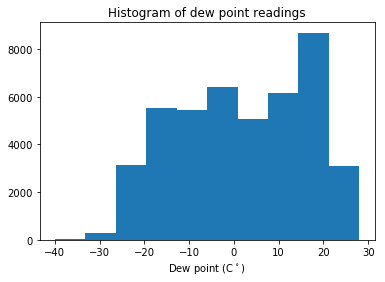

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title("Histogram of dew point readings")
ax.set_xlabel("Dew point (C$^\circ$)")
ax.hist(PRSA.DEWP)


## 3.1 Understanding the plotting code

So how was this produced? 

1. We initialized a figure object using `plt.figure`. 
2. Next we created an axis within the figure. We used the command `fig.add_subplot`. We passed an argument `111` to the function which is a short hand for creating only one axes. We will learn about this command in the next unit. 
3. With an ax object created, we now set a title using the `set_title` function and also label the x -axis with its label. 
4. The histogram proper is plotting by calling the `hist` method on the axes instance. We merely need to pass the (1-dimensional) array of data to the function. 

Notice the output that is produced. It's not very nice and probably needs some prettying up. But as a quick exploratory plot, it does its job. Notice the extra textual output. These can be suppressed with the `;` written at the end of the last statement in the code block. 

## 3.2 Customizing our histogram

The chart above can be customized to our liking by passing keyword arguments to the function. In order to see the effects of each individual customization, copy the code given after explanatory text into the function given below and run the cell to see the output. 

1. **Number of bins**. The number of bins may be adjusted with the `bins=` keyword argument. However, do note that more bins does not translate into a better chart. With more bins, one tends to pick up much more variation between data (noise) that what is necessary. Therefore, try to choose a value which will give you the best sense of how the data is dristributed between the extremes of no details (small `bins` value) to a noisy chart (high `bins` value). 

2. **Normalization**. Setting `normed=True` (it is `False` by default) means that the total area of the histogram is set to 1. This setting is useful to compare distributions of variables on different orders of magnitude. 

3. **Is a log scale needed?**. `log=` flag may be used if you want the *count* (*or relative counts*) to be plotted on a log scale. This may be useful if the counts in different bins differ by huge orders of magnitude. This is especially true for data modelled by to power law distributions. 

4. **Cumulative sums**. Sometimes, you want to plot the ogive instead. Enable this by setting `cumulative=True`. 

3. **Colors**. Selecting the best color, especially when comparing multiple histograms on the same axis is crucial. You have choose different colors using `color=` argument. You may use any hexadecimal color codes (e.g. `##660000`) or CSS color names, matplotlib color abbrevations (e.g. `c` for `cyan`, `m` for magenta, `b` for blue etc..) 

1. **Lines between bars**. A histogram is more presentable is one draws lines between bars. Enable this by setting `lw=` to an appropraite thickness (any value around 0.5 is ok) and giving it a color by setting `ec=`. 

3. **Transparency control**. This is useful if there are multiple histograms. Use `alpha=` and enter any value from 0 (fully transparent) to 1 (fully opaque). 

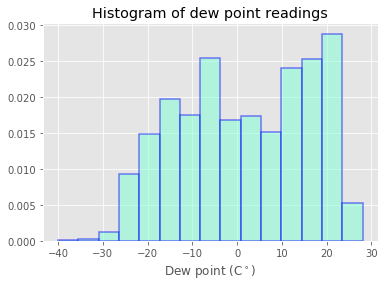

In [39]:
# Uncomment the line below and run the cell to see the output
from matplotlib.style import use

use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title("Histogram of dew point readings")
ax.set_xlabel("Dew point (C$^\circ$)")
ax.hist(PRSA.DEWP, bins=15,normed=True,log=False,cumulative=False,color="aquamarine", lw=1.5, ec='b', alpha=0.5);


More options can be found of the [documentation page][1].

[1]:http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html?highlight=hist#matplotlib.axes.Axes.hist